In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm #for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [50]:
age=np.array([20,21,22,24,25,25,
       26,27,27,28,28,28,
       29,30,31,31,32,33,
       33,34,35,36])
income=[x**3/np.random.randint(2,4) for x in age]

### Yukarıdaki iki listeyi 'pandas' ile DataFrame'e aktaralım:

In [51]:
df=pd.DataFrame({"age":age,
                "income":income})

In [52]:
df

,age,income
0,20,4000.000000
1,21,4630.500000
2,22,3549.333333
3,24,6912.000000
4,25,5208.333333
5,25,7812.500000
6,26,8788.000000
7,27,9841.500000
8,27,9841.500000
9,28,10976.000000


In [53]:
df.describe()

,age,income
count,22.000000,22.000000
mean,28.409091,10698.143939
std,4.489767,4460.073199
min,20.000000,3549.333333
25%,25.250000,8056.375000
50%,28.000000,10453.166667
75%,31.750000,13767.375000
max,36.000000,19652.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     22 non-null     int32  
 1   income  22 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 392.0 bytes


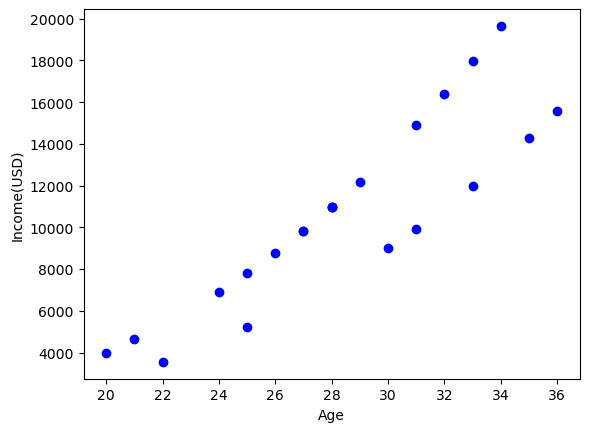

In [55]:
plt.scatter(df.age,df.income,color='blue')
plt.xlabel("Age")
plt.ylabel("Income(USD)")
plt.show()

İki data arasında linear bir ilişki gözüküyor.Aralarındaki correlationa bakalım:

In [56]:
df.corr()

,age,income
age,1.000000,0.894973
income,0.894973,1.000000


0.9 gibi oldukça güçlü bir correlation var.

Şimdi öyle bi reggression line belirlememiz gerekiyor ki average'ın dışında kalanlar için bile bir prediction yapılabilsin.

$y=mx+c$

In [57]:
x=df.age
y_real=df.income

In [58]:
x=sm.add_constant(x) #constand adding

In [59]:
model=sm.OLS(y_real,x).fit() #working of the model

In [60]:
model.summary() #info

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     80.49
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.90e-08
Time:                        13:37:55   Log-Likelihood:                -197.81
No. Observations:                  22   AIC:                             399.6
Df Residuals:                      20   BIC:                             401.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.456e+04   2848.577     -5.111      0.000   -2.05e+04   -8617.054
age          889.0544     99.096      8.972      0.000     682.345    1095.764
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   2.661
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.408
Skew:                           0.018   Prob(JB):                        0.815
Kurtosis:                       2.333   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$ \textbf{OLS (Ordinary Least Squared):} $ Sıradan en küçük kareler yöntemidir. Doğrusal regresyon modeli kurulurken verilerin ortasından geçen eğime (çizgiye) en az kare farkı ile yaklaşmaya çalışan bir yöntemdir.

$\textbf{R-Squared (R2):}$ Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. Bizim tablomuzda bu değer 0.80 olup görece iyi bir sonuç diyebiliriz. Sosyal bilimler için 0.70 üzeri ve doğa bilimleri için ise değişkenlik göstermekte olup 0.60 üzeri kabul edilebilir bir başarı ölçütü sayılabilir.

$\textbf{Adjusted (Düzenlenmiş) R-Squared:}$ Bu değer genellikle çoklu regresyon analizinde kullanılır. Modele değişken eklendikçe R2 değeri değişkeni etkili varsayıp varyansını açıkladığını sanabilir. Ancak düzenlenmiş R2 mantığında her bir değişkenin bağımlı değişken üzerindeki etkisi ölçülerek daha optimum sonuçlar vermektedir. Tabloyu yorumlarken bu iki değerin birbirine yakın çıkması önemli bir konu olup bizim tablomuzda her iki değerinde (0.80-0.79) birbirine yakın olduğu görülmektedir. Bu çıktının anlamak için şöyle bir örnek verilebilir. Örneğin bir evin hem brüt hem de net metrekaresi bulunur. Brüt metrekare her şeyi içine dahil ederken net ise sadece yaşam alanına odaklanır. Dolayısı ile ev bakarken bu ikisi arasındaki farkı bilmek önemlidir. Model sonucunu incelerken de bu alana bakılması önemlidir.

$ \textbf{Coefficients (Katsayılar):} $  Regresyon katsayısı, iki veya daha fazla değişken arasındaki ortalama fonksiyonel ilişkinin istatistiksel bir ölçüsüdür. Tablo 2'de const için yazan yerde regresyon formülündeki sabitin değerini verirken, Yas için yazan yerde ise yaştaki bir birimlik değişimde gelirin ne kadar değişeceğini göstermektedir. Dolayısı ile regresyon tahmin yaparken buradaki katsayılardan yararlanır. Formülde yerine yerleştirecek olursak; Y(tahmin edilecek değer) = X(Yaş) * m(Eğim) + b (sabit değer). Örneğin: Yaşı 20 olan birinin gelirine 2666.666 demiştik. Şimdi regresyon doğrusunu çizdikten sonra bu modele göre yaşı 20 olan birisine ne kadarlık bir gelir belirleyecek hesaplayalım. Y (Gelir) = (20 * 953.512) + (-17320) ise tahmini gelir = 1749 olacaktır. Arada neredeyse 900 TL gibi bir fark var. Yüksek görünse de doğrusal bir model olduğu için en optimum noktadaki eğimin verdiği sonuç budur.

$\textbf{P-Value:}$ Bu değer bize bağımsız değişkenden çıkan katsayının istatistiksel olarak anlamlı olup olmadığını vermektedir. Bilim dünyasında genel olarak kabul edilen anlamlılık değeri x<0.05'dir. Eğer bu değerin üzerinde bir sonuç çıkıyorsa ilgili bağımsız değişkenin modele etkisi anlamlı değildir. Bu değer, çok değişkenli regresyon analizinde değişkenlerin seçimi sırasında kullanılmaktadır. Tablo 2'de çıkan P-Value değerinin ise .05'den küçük olduğu görülmekte olup yaş değişkeninin katsayısının istatistiksel olarak anlamlı olduğu düşünülebilir. Aslında yukarıdaki (4. madde) işlemin yapılmasından önce bu değerin kontrolünün sağlanması gerekmektedir.

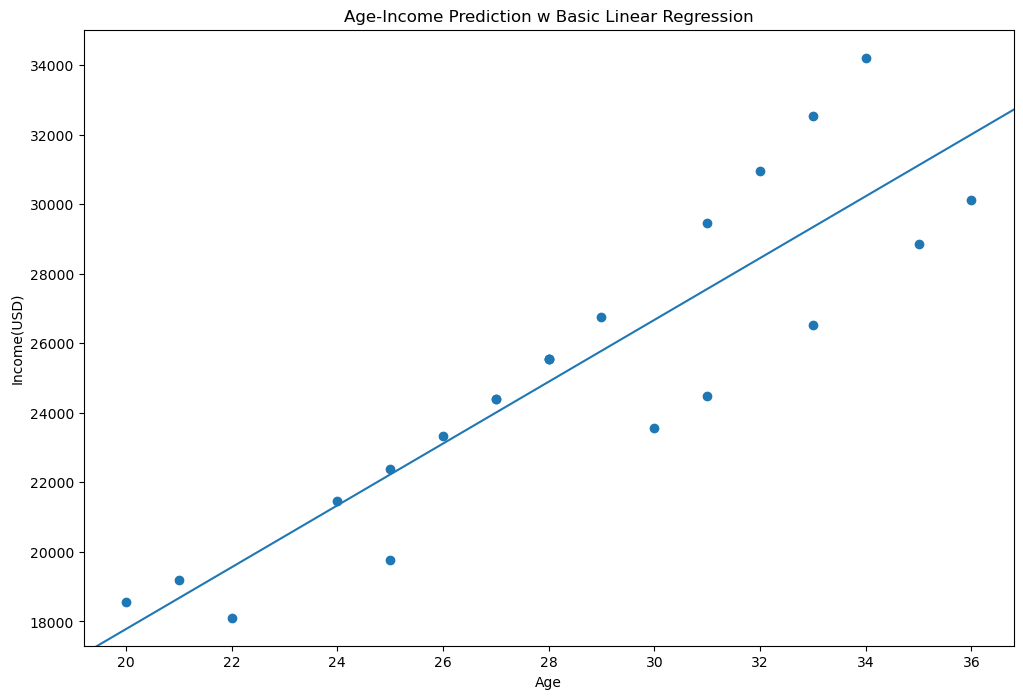

In [67]:
fig, ax = plt.subplots(figsize=(12, 8)) #plot size
fig=sm.graphics.plot_ccpr(model,"age",ax=ax)
plt.title("Age-Income Prediction w Basic Linear Regression")
plt.xlabel("Age")
plt.ylabel("Income(USD)")
plt.show()


### Modelimize göre income prediction ne çıkmaktadır.Ona bakalım:

In [76]:
y_pred=model.predict(x) #elimizdeki age verisine göre modelin income predicti
print(f"Predicted Income:\n {y_pred}")

Predicted Income:
 0      3222.005083
1      4111.059433
2      5000.113784
3      6778.222485
4      7667.276835
5      7667.276835
6      8556.331186
7      9445.385536
8      9445.385536
9     10334.439887
10    10334.439887
11    10334.439887
12    11223.494237
13    12112.548588
14    13001.602939
15    13001.602939
16    13890.657289
17    14779.711640
18    14779.711640
19    15668.765990
20    16557.820341
21    17446.874691
dtype: float64


### Comparetion to Real Values w Predicted Values

In [77]:
compare=pd.DataFrame({'Real_Values':y_real,
                     'Predicted_Values':y_pred})

In [78]:
compare["predic_error"]=compare.Real_Values-compare.Predicted_Values

In [81]:
compare

,Real_Values,Predicted_Values,predic_error
0,4000.000000,3222.005083,777.994917
1,4630.500000,4111.059433,519.440567
2,3549.333333,5000.113784,-1450.780450
3,6912.000000,6778.222485,133.777515
4,5208.333333,7667.276835,-2458.943502
5,7812.500000,7667.276835,145.223165
6,8788.000000,8556.331186,231.668814
7,9841.500000,9445.385536,396.114464
8,9841.500000,9445.385536,396.114464
9,10976.000000,10334.439887,641.560113


### Source: https://yigitsener.medium.com/makine-%C3%B6%C4%9Frenmesinde-python-ile-basit-do%C4%9Frusal-regresyon-modelinin-kurulmas%C4%B1-ve-yorumlanmas%C4%B1-4cf918e1adf